<a href="https://colab.research.google.com/github/dimLMT/Metabolic-Syndrome-Forecast/blob/main/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
# Confirm the file was saved by loading it back in
loaded = joblib.load('/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/part1.joblib')
loaded.keys()

dict_keys(['X_train_tf', 'y_train', 'X_test_tf', 'y_test', 'model', 'permutation_importances', 'X', 'y'])

In [5]:
# Loading data and objects in a new notebook
X_train_tf = loaded['X_train_tf']
y_train = loaded['y_train']
X_test_tf = loaded['X_test_tf']
y_test = loaded['y_test']
y_train.head()

seqn
69151    No MetSyn
70567    No MetSyn
64333    No MetSyn
68115    No MetSyn
67719    No MetSyn
Name: MetabolicSyndrome, dtype: object

In [6]:
X_train_tf= X_train_tf.rename({'Sex_Female':'Is_Female'}, axis=1)
X_train_tf= X_train_tf.drop(['Sex_Male'], axis=1)
X_test_tf= X_test_tf.rename({'Sex_Female':'Is_Female'}, axis=1)
X_test_tf= X_test_tf.drop(['Sex_Male'], axis=1)
pd.set_option('display.max_columns', None)
X_test_tf.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Is_Female,Marital_Divorced,Marital_Married,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,,,
71097,-1.569729,-1.286064,-1.440762,-0.740883,-0.369369,-0.111308,-0.743077,-0.454858,0.419292,-0.545254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63684,0.309088,-0.252418,0.109800,0.032960,-0.369369,-0.114944,-0.118707,-0.008219,0.288388,-0.523117,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67939,1.333897,1.524161,-0.287295,-0.589149,-0.369369,-0.158786,-0.604328,0.270930,2.513749,-0.246397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67195,0.024418,0.361309,0.248468,0.154347,-0.369369,-0.153248,-0.188082,-0.371113,-0.235226,-0.700217,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70058,-0.601854,-0.252418,-1.465975,-1.180911,-0.369369,-0.154431,0.158790,-0.036134,0.222936,-0.556323,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Sklearn Display
from sklearn import set_config
set_config(transform_output='pandas')

# encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)
y_test_enc

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

# Start building a small neural network

In [8]:
#keras imports
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import metrics

In [9]:
# Scale data
scaler = MinMaxScaler()
X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)
X_train_tf.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Is_Female,Marital_Divorced,Marital_Married,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,,,
69151,0.616667,1.000000,0.328881,0.233273,0.0,0.000388,0.315789,0.224490,0.311111,0.037354,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70567,1.000000,0.137931,0.377295,0.211573,0.5,0.007854,0.505263,0.157434,0.148148,0.075486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64333,0.433333,0.195402,0.251252,0.235081,0.0,0.000110,0.210526,0.183673,0.281481,0.115175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68115,1.000000,0.195402,0.238731,0.222423,0.0,0.004404,0.568421,0.259475,0.251852,0.072374,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
67719,0.250000,0.908046,0.217863,0.202532,1.0,0.095785,0.557895,0.000000,0.355556,0.067704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [11]:
keras.backend.clear_session()

def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
                  metrics=[metrics.BinaryAccuracy(), metrics.Recall(), metrics.Precision()])
    return model

# Call our build function to build model
model1 = build_model()

# Get model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
early_stop = EarlyStopping(monitor='val_binary_accuracy', patience=5)
history = model1.fit(X_train_tf, y_train_enc,
                        validation_split = 0.2,
                        epochs=50,
                        callbacks = [early_stop])

Epoch 1/50
45/45 [==============================] - 2s 17ms/step - loss: 0.7232 - binary_accuracy: 0.4132 - recall: 0.2542 - precision: 0.6419 - val_loss: 0.6893 - val_binary_accuracy: 0.5722 - val_recall: 0.8190 - val_precision: 0.6291
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 0.6599 - binary_accuracy: 0.6632 - recall: 0.9916 - precision: 0.6643 - val_loss: 0.6626 - val_binary_accuracy: 0.6417 - val_recall: 0.9957 - val_precision: 0.6435
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.6401 - binary_accuracy: 0.6625 - recall: 1.0000 - precision: 0.6620 - val_loss: 0.6532 - val_binary_accuracy: 0.6444 - val_recall: 0.9957 - val_precision: 0.6453
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.6314 - binary_accuracy: 0.6625 - recall: 1.0000 - precision: 0.6620 - val_loss: 0.6444 - val_binary_accuracy: 0.6500 - val_recall: 0.9957 - val_precision: 0.6489
Epoch 5/50
45/45 [==============================] - 0s 

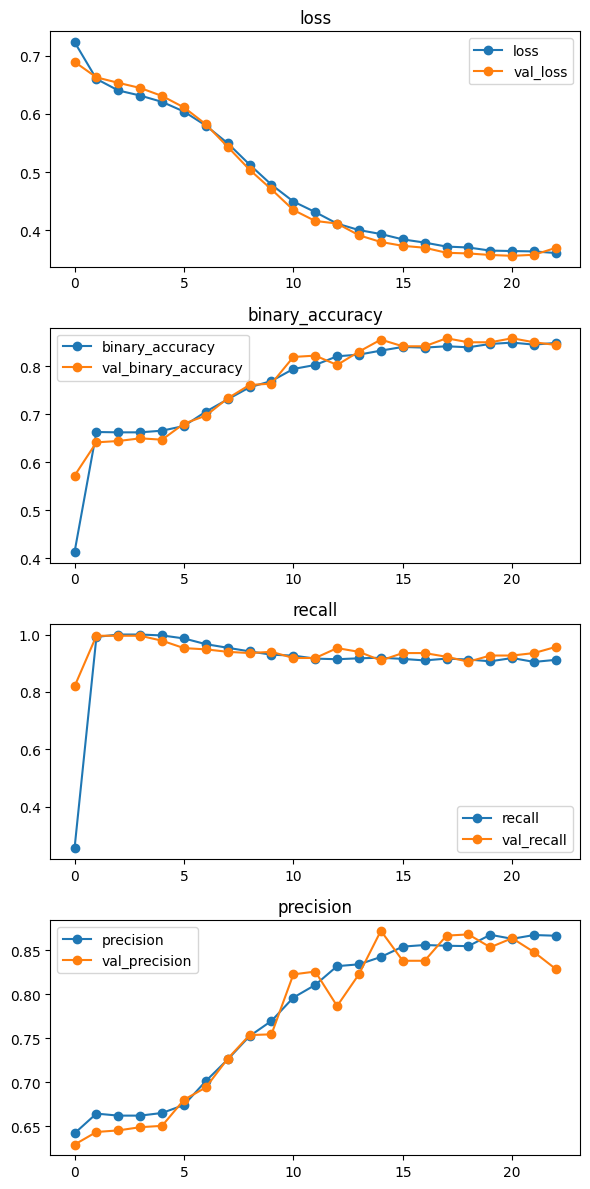

In [13]:
# plot learning
plot_history(history);

In [14]:
# make predictions
y_pred_test = model1.predict(X_test_tf)
# round the predictions
y_pred_test = np.round(y_pred_test)

19/19 [==============================] - 0s 2ms/step


In [15]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):

    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', values_format="d", colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")

    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, values_format=".2f", colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")

    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       206
           1       0.83      0.93      0.88       395

    accuracy                           0.83       601
   macro avg       0.83      0.78      0.80       601
weighted avg       0.83      0.83      0.82       601



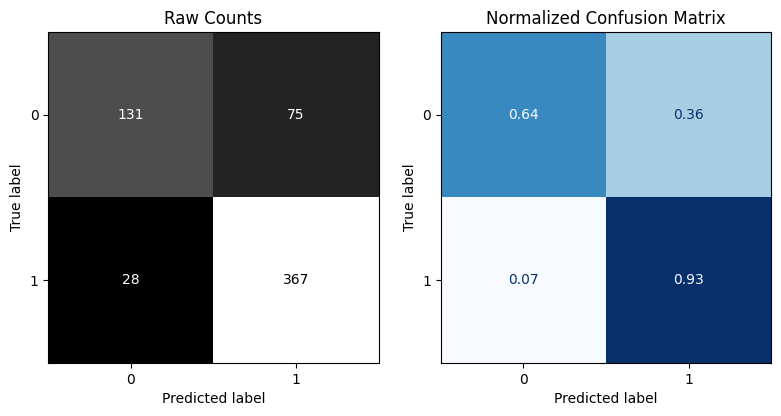

In [16]:
classification_metrics(y_test_enc, y_pred_test, label='Test Data')

# The model can be made complex with more layers for better prediction

In [17]:
keras.backend.clear_session()
from keras import regularizers
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(20, activation = 'tanh', activity_regularizer=regularizers.l1(0.01)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
                  metrics=[metrics.BinaryAccuracy(), metrics.Recall(), metrics.Precision()])
    return model

# Call our build function to build model
model2 = build_model()

# Get model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 dense_4 (Dense)             (None, 20)                320       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 10)                1

Epoch 1/50
45/45 [==============================] - 2s 12ms/step - loss: 0.7687 - binary_accuracy: 0.6611 - recall: 0.9989 - precision: 0.6613 - val_loss: 0.7508 - val_binary_accuracy: 0.6444 - val_recall: 1.0000 - val_precision: 0.6444
Epoch 2/50
45/45 [==============================] - 0s 5ms/step - loss: 0.7294 - binary_accuracy: 0.6611 - recall: 1.0000 - precision: 0.6611 - val_loss: 0.7223 - val_binary_accuracy: 0.6444 - val_recall: 1.0000 - val_precision: 0.6444
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 0.7018 - binary_accuracy: 0.6611 - recall: 1.0000 - precision: 0.6611 - val_loss: 0.6934 - val_binary_accuracy: 0.6444 - val_recall: 1.0000 - val_precision: 0.6444
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.6660 - binary_accuracy: 0.6611 - recall: 1.0000 - precision: 0.6611 - val_loss: 0.6371 - val_binary_accuracy: 0.6444 - val_recall: 1.0000 - val_precision: 0.6444
Epoch 5/50
45/45 [==============================] - 0s 

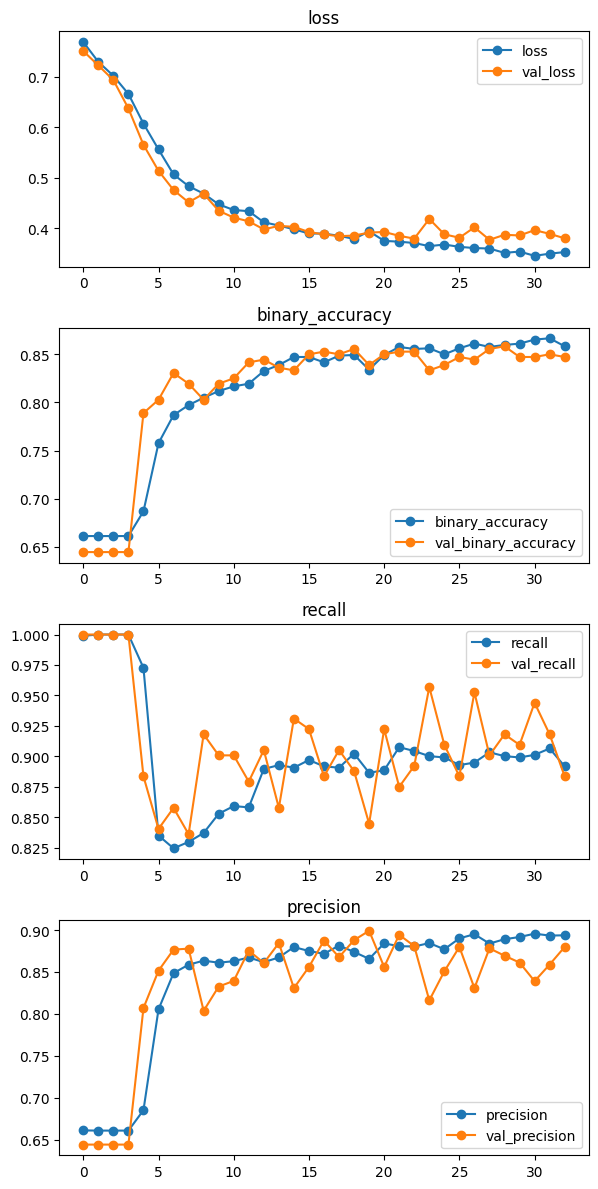

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model2.fit(X_train_tf, y_train_enc,
                        validation_split = 0.2,
                        epochs=50,
                        callbacks = [early_stop])
plot_history(history);

19/19 [==============================] - 0s 3ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       206
           1       0.87      0.81      0.84       395

    accuracy                           0.80       601
   macro avg       0.78      0.79      0.78       601
weighted avg       0.81      0.80      0.80       601



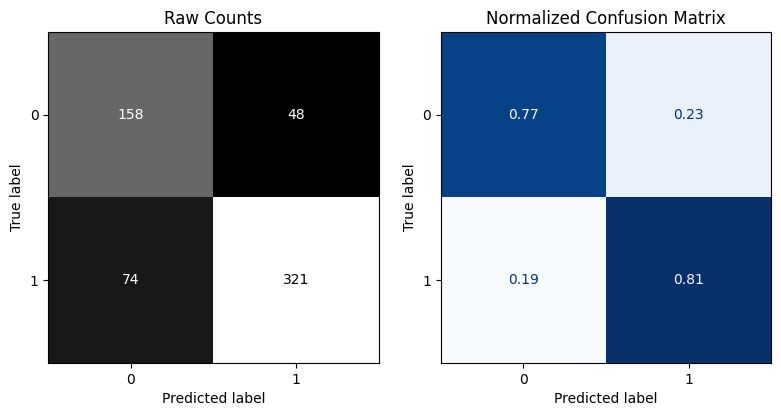

In [19]:
# make predictions
y_pred_test = model2.predict(X_test_tf)
# round the predictions
y_pred_test = np.round(y_pred_test)
classification_metrics(y_test_enc, y_pred_test, label='Test Data')

# Use Keras Tuner for fine tuning

In [22]:
keras.backend.clear_session()
# !pip install keras_tuner
import keras_tuner as kt
from keras_tuner import HyperParameters as hp

def build_model(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=30, step=5), activation='tanh'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.4, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  metrics=['accuracy', metrics.Recall(), metrics.Precision()])
    return model

In [23]:
# Make a folder to store results of hyperparameter tuning
import os
folder = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week19/Data/KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [24]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

In [25]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
history = tuner.search(X_train_tf, y_train_enc,
                        validation_split = 0.2,
                        callbacks = [early_stop])

Trial 90 Complete [00h 00m 14s]
val_accuracy: 0.8472222089767456

Best val_accuracy So Far: 0.8694444298744202
Total elapsed time: 00h 08m 49s


In [26]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 10,
 'dropout_value': 0.2,
 'optimizer': 'adam',
 'tuner/epochs': 17,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

19/19 [==============================] - 0s 2ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       206
           1       0.86      0.88      0.87       395

    accuracy                           0.83       601
   macro avg       0.81      0.80      0.81       601
weighted avg       0.83      0.83      0.83       601



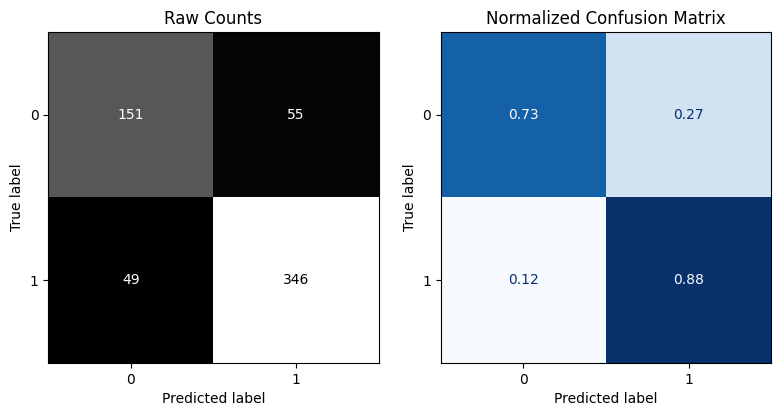

In [27]:
# Obtain best model
best_model = tuner.get_best_models()[0]
# Evaluate neural network with tuned optimizer, units, and dropout
y_pred_test = best_model.predict(X_test_tf)
# round the predictions
y_pred_test = np.round(y_pred_test)
classification_metrics(y_test_enc, y_pred_test, label='Test Data')

In [92]:
keras.backend.clear_session()
def build_model(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(5, activation = 'sigmoid'))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value1", min_value=0.8, max_value=1, step=0.1)))
    # Try different values for units
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(units=hp.Int('units', min_value=20, max_value=30, step=5), activation=hp.Choice('activation',['tanh','relu'])))
    model.add(Dropout(hp.Float(name="dropout_value2", min_value=0.1, max_value=0.6, step=0.1)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer='rmsprop',
                  metrics=['accuracy', metrics.Recall(), metrics.Precision()])
    return model

In [93]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=70,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuningg')

In [94]:
history = tuner.search(X_train_tf, y_train_enc,
                       validation_split = 0.2)

Trial 88 Complete [00h 00m 25s]
val_accuracy: 0.6472222208976746

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 18m 20s


In [95]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'dropout_value1': 0.8,
 'units': 25,
 'activation': 'tanh',
 'dropout_value2': 0.5,
 'tuner/epochs': 70,
 'tuner/initial_epoch': 24,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0078'}

19/19 [==============================] - 0s 2ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       206
           1       0.87      0.88      0.88       395

    accuracy                           0.84       601
   macro avg       0.82      0.82      0.82       601
weighted avg       0.84      0.84      0.84       601



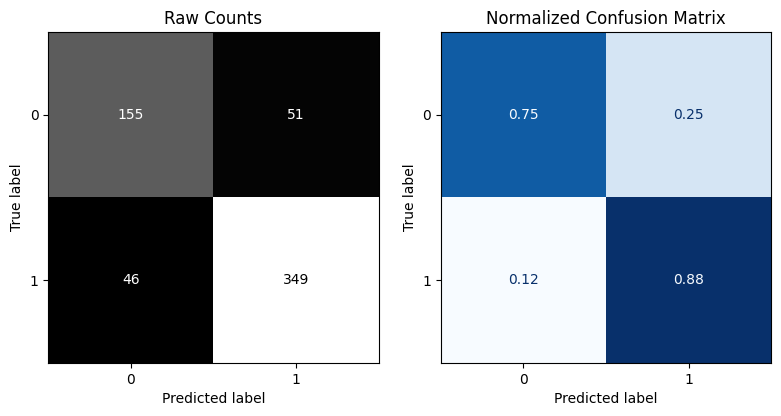

In [96]:
# Obtain best model
best_model = tuner.get_best_models()[0]
# Evaluate neural network with tuned optimizer, units, and dropout
y_pred_test = best_model.predict(X_test_tf)
# round the predictions
y_pred_test = np.round(y_pred_test)
classification_metrics(y_test_enc, y_pred_test, label='Test Data')

# So far, the best model is the one with only 1 hidden layer where the False Negative is the smallest. Further tuning will be needed.